# Regularisation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset first.

In [ ]:
dataset=load_diabetes(return_X_y=False,as_frame=True)

In [ ]:
# dataset=pd.read_csv("auto-mpg.csv")

In [ ]:
dataset

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [ ]:
# dataset_x=dataset.drop("mpg",axis=1)
dataset_x=dataset["data"]
dataset_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
# dataset_y=dataset["mpg"]
dataset_y=dataset["target"]
dataset_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## Some EDA

In [ ]:
dataset_x.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [ ]:
dataset_x.shape

(442, 10)

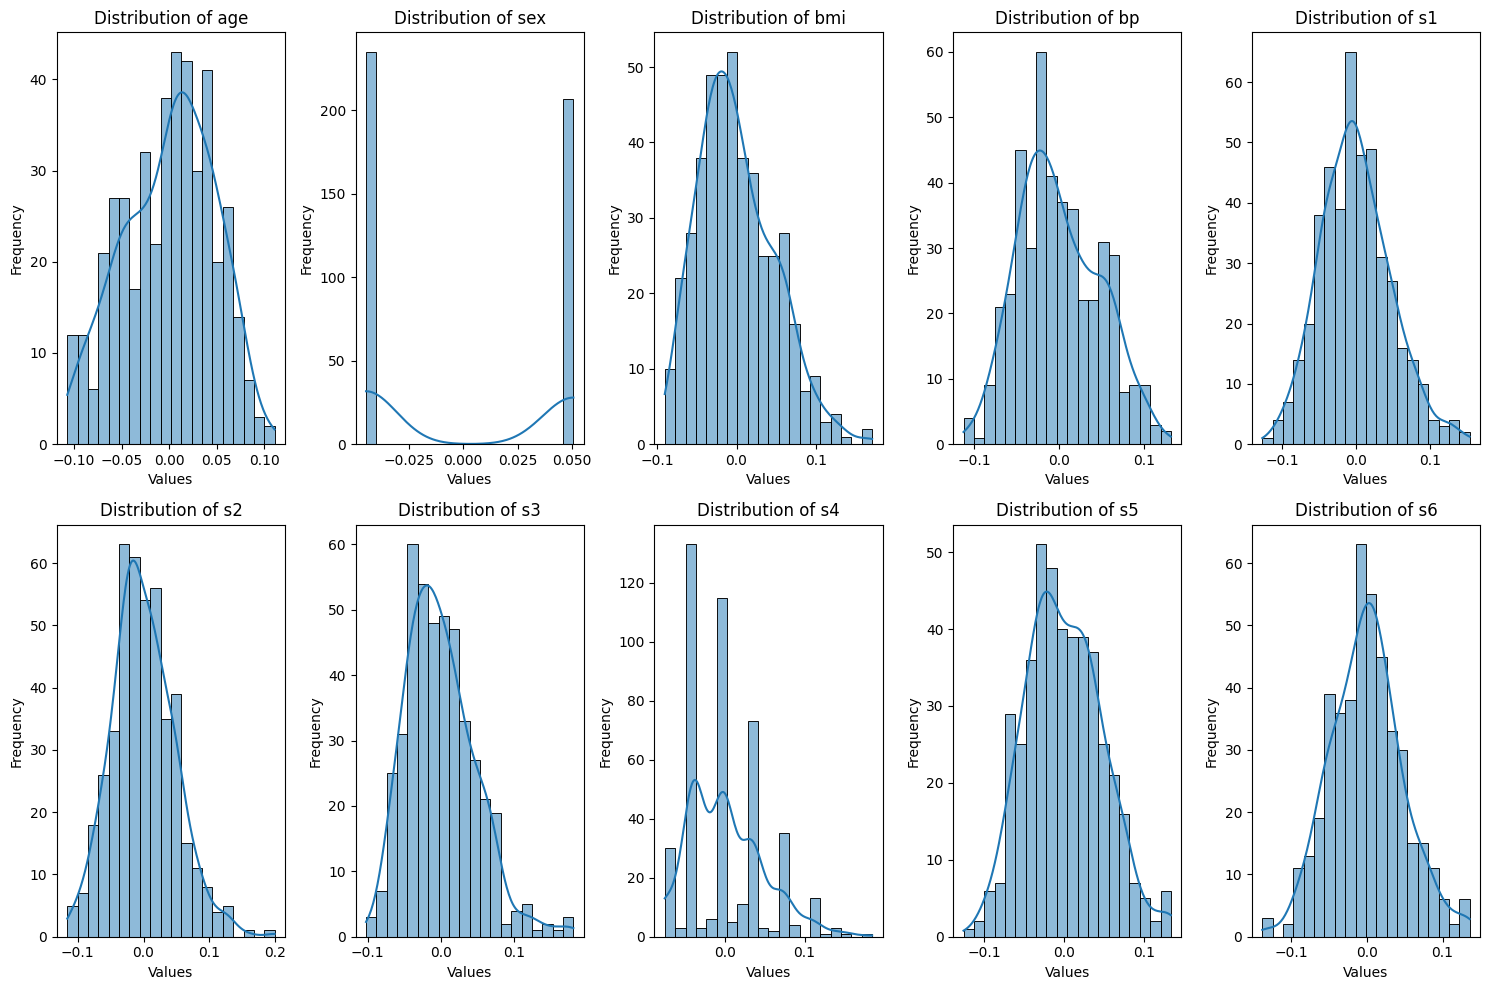

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=5 #3 if mpg
                      ,figsize=(15,10))
for i,column in enumerate(dataset_x.columns):
  row=i//5 #3 if mpg
  col=i%5 # 3 if mpg
  sns.histplot(dataset_x[column],kde=True,bins=20,ax=axes[row,col])
  axes[row,col].set_title(f'Distribution of {column}')
  axes[row,col].set_xlabel('Values')
  axes[row,col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Uncomment for mpg

In [ ]:
# dataset_x.isna().sum()

In [ ]:
# dataset_x["horsepower"].replace(to_replace=np.nan,value=dataset_x["horsepower"].mean(),inplace=True)

In [ ]:
# dataset_x.isna().sum()

## Some Preprocessing

In [ ]:
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(X=dataset_x)

In [ ]:
X

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

## Let's Fit it

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
linearReg=LinearRegression()
lassoReg=Lasso(alpha=0.8)
ridgeReg=Ridge(alpha=0.8)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,dataset_y,test_size=0.3,random_state=42)

In [ ]:
linearReg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lassoReg.fit(X_train,Y_train)

Lasso(alpha=0.8)

In [ ]:
ridgeReg.fit(X_train,Y_train)

Ridge(alpha=0.8)

In [ ]:
y_pred_lin=linearReg.predict(X_test)
y_pred_las=lassoReg.predict(X_test)
y_pred_rid=ridgeReg.predict(X_test)

In [ ]:
mean_squared_error(Y_test,y_pred_lin)

2821.750981001311

In [ ]:
mean_squared_error(Y_test,y_pred_las)

2791.734198500469

In [ ]:
mean_squared_error(Y_test,y_pred_rid)

2820.1689560817795

In [ ]:
print("Coefficients for Linear Regression\n", linearReg.coef_)
print("Coefficients for Lasso Regression\n", lassoReg.coef_)
print("Coefficients for Ridge Regression\n", ridgeReg.coef_)

Coefficients for Linear Regression
 [  1.3914715  -12.44810731  25.98482795  18.4742251  -42.90184638
  24.10426929   5.7627248   13.70044051  31.35822615   1.96808897]
Coefficients for Lasso Regression
 [  0.71160591 -10.65653675  26.68035405  17.43171554  -8.9887898
  -0.          -9.47043662   5.95435193  19.12980959   1.95172499]
Coefficients for Ridge Regression
 [  1.47167045 -12.3603625   26.11482983  18.3550353  -34.51240699
  17.59052363   2.03984658  12.4981117   28.07619445   2.09014313]


You can see how lasso reduced a coefficient to 0 to avoid overfitting. But Ridge remains almost similar to the Linear Regression loss but still has lesser weights.

Let's try with polynomial Regression

In [ ]:
linearRegpoly=LinearRegression()
lassoRegpoly=Lasso(alpha=0.8)
ridgeRegpoly=Ridge(alpha=0.8)

In [ ]:
poly=PolynomialFeatures(degree=2) #6 if mpg

In [ ]:
X_train_polynomial=poly.fit_transform(X_train)
X_test_polynomial=poly.transform(X_test)

X_train_polynomial_transformed=scaler.fit_transform(X_train_polynomial)
X_test_polynomial_transformed=scaler.transform(X_test_polynomial)

In [ ]:
linearRegpoly.fit(X_train_polynomial_transformed,Y_train)

LinearRegression()

In [ ]:
lassoRegpoly.fit(X_train_polynomial_transformed,Y_train)

Lasso(alpha=0.8)

In [ ]:
ridgeRegpoly.fit(X_train_polynomial_transformed,Y_train)

Ridge(alpha=0.8)

In [ ]:
y_pred_lin_poly=linearRegpoly.predict(X_test_polynomial_transformed)
y_pred_las_poly=lassoRegpoly.predict(X_test_polynomial_transformed)
y_pred_rid_poly=ridgeRegpoly.predict(X_test_polynomial_transformed)

In [ ]:
mean_squared_error(Y_test,y_pred_lin_poly)

3321.402643100918

In [ ]:
mean_squared_error(Y_test,y_pred_las_poly)

2760.3438958078814

In [ ]:
mean_squared_error(Y_test,y_pred_rid_poly)

2996.197210019177

In [ ]:
print("Coefficients for Linear Regression\n Zeroes:", len(linearRegpoly.coef_[linearRegpoly.coef_==0])," Non-Zero: ",len(linearRegpoly.coef_[linearRegpoly.coef_!=0]))
print("Coefficients for Lasso Regression\n Zeroes:", len(lassoRegpoly.coef_[lassoRegpoly.coef_==0])," Non-Zero: ",len(lassoRegpoly.coef_[lassoRegpoly.coef_!=0]))
print("Coefficients for Ridge Regression\n Zeroes:", len(ridgeRegpoly.coef_[ridgeRegpoly.coef_==0])," Non-Zero: ",len(ridgeRegpoly.coef_[ridgeRegpoly.coef_!=0]))

Coefficients for Linear Regression
 Zeroes: 0  Non-Zero:  66
Coefficients for Lasso Regression
 Zeroes: 33  Non-Zero:  33
Coefficients for Ridge Regression
 Zeroes: 1  Non-Zero:  65


This notebook is made refering to last year's TA session